<a href="https://colab.research.google.com/github/keval2232/regression_models/blob/main/Custom_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import section

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


## Define Model

You define your model as a class. 
- `x` is your input tensor. 
- The model should output values of **wx+b**. 
- You'll start off by initializing w and b to random values. 
- During the training process, values of w and b get updated in accordance with linear regression so as to minimize the loss incurred by the model. 
- Once you arrive at optimal values for w and b, the model would have been trained to correctly predict the values of wx+b.

Hence, 
- **w** and **b** are trainable weights of the model. 
- **x** is the input
- **y** = wx + b is the output

In [3]:
class Model(object):
  def __init__(self):
    self.w=tf.Variable(5.0)
    self.b=tf.Variable(0.0)
  def __call__(self,x):
    return self.w*x+self.b  
model = Model()    

### Obtain training data

First, synthesize the training data using the "true" w and "true" b. 

$$y = w_{true} \times x + b_{true} $$

In [7]:
TRUE_w=3.0
TRUE_b=2.0
NUM_EXAMPLES=1000
xs =  tf.random.normal(shape=[NUM_EXAMPLES])
ys=(TRUE_w*xs)+TRUE_b
#print(ys)

## ploating of dataset

In [5]:
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b', marker='.')
  predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
  plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
  plt.show()

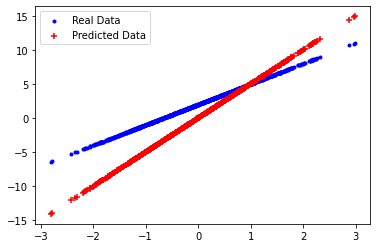

Current loss: 8.030962


In [8]:
plot_data(xs, ys, model(xs))
print('Current loss: %1.6f' % loss(model(xs), ys).numpy())

### Define a loss function

A loss function measures how well the output of a model for a given input matches the target output. 
- The goal is to minimize this difference during training. 
- Let's use the standard L2 loss, also known as the least square errors
$$Loss = \sum_{i} \left (y_{pred}^i - y_{target}^i \right )^2$$

In [4]:
def loss(y_true,y_pred):
  return tf.reduce_mean(tf.square(y_true-y_pred))

### Define a training loop

With the network and training data, train the model using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) 
- Gradient descent updates the trainable weights **w** and **b** to reduce the loss. 


There are many variants of the gradient descent scheme that are captured in `tf.train.Optimizer`—our recommended implementation. In the spirit of building from first principles, here you will implement the basic math yourself.
- You'll use `tf.GradientTape` for automatic differentiation
- Use `tf.assign_sub` for decrementing a value.  Note that assign_sub combines `tf.assign` and `tf.sub`

In [10]:
def train(model,inputs,outputs,learning_rate):
  with tf.GradientTape() as tape:
    current_loss=loss(outputs,model(inputs))
  dw,db=tape.gradient(current_loss,[model.w,model.b])
  model.w.assign_sub(learning_rate*dw)
  model.b.assign_sub(learning_rate*db)
  return current_loss  

## defining the training loop

In [11]:
model = Model()

# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(50)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=5.00 b=0.00, loss=8.03096
Epoch  1: w=4.60 b=0.41, loss=5.12962
Epoch  2: w=4.28 b=0.73, loss=3.27654
Epoch  3: w=4.03 b=0.99, loss=2.09294
Epoch  4: w=3.82 b=1.19, loss=1.33694
Epoch  5: w=3.66 b=1.36, loss=0.85404
Epoch  6: w=3.53 b=1.49, loss=0.54558
Epoch  7: w=3.42 b=1.59, loss=0.34854
Epoch  8: w=3.34 b=1.67, loss=0.22266
Epoch  9: w=3.27 b=1.74, loss=0.14226
Epoch 10: w=3.22 b=1.79, loss=0.09089
Epoch 11: w=3.18 b=1.84, loss=0.05807
Epoch 12: w=3.14 b=1.87, loss=0.03710
Epoch 13: w=3.11 b=1.90, loss=0.02371
Epoch 14: w=3.09 b=1.92, loss=0.01515
Epoch 15: w=3.07 b=1.93, loss=0.00968
Epoch 16: w=3.06 b=1.95, loss=0.00619
Epoch 17: w=3.05 b=1.96, loss=0.00395
Epoch 18: w=3.04 b=1.97, loss=0.00253
Epoch 19: w=3.03 b=1.97, loss=0.00161
Epoch 20: w=3.02 b=1.98, loss=0.00103
Epoch 21: w=3.02 b=1.98, loss=0.00066
Epoch 22: w=3.02 b=1.99, loss=0.00042
Epoch 23: w=3.01 b=1.99, loss=0.00027
Epoch 24: w=3.01 b=1.99, loss=0.00017
Epoch 25: w=3.01 b=1.99, loss=0.00011
Epoch 26: w=

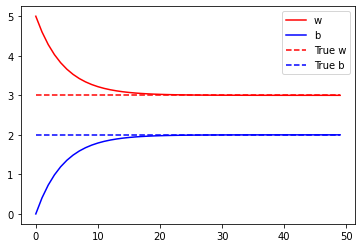

In [12]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
      [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

## Plots for Evaluation
Now you can plot the actual outputs in red and the model's predictions in blue on a set of random test examples.

You can see that the model is able to make predictions on the test set fairly accurately.

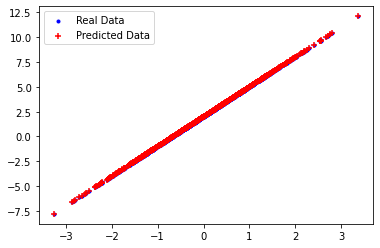

In [13]:
test_inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

Visualize the cost function against the values of each of the trainable weights the model approximated to over time.

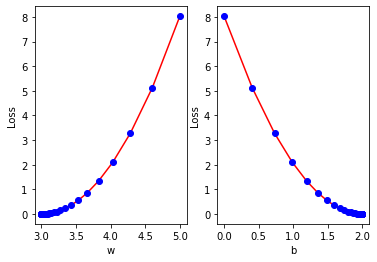

In [14]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')
    
    
weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)